In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#The data
Collected in the fall semester of 2020. The questionnaire consists of three parts:
0. Consent to participate in the study
1. Identifiyng background data (full name)
2. Open-ended questions about time management, support systems and belonging
3. Instruments to assess academic self-efficacy and the sense of school belonging

In [3]:
#reading the data
#this here was the raw unchanged data
#reflex = pd.read_excel(r'/content/drive/MyDrive/Colab Notebooks/inf2020/data/refleks.xlsx')

In [4]:
#reading the data
#this here is the data that was has the spelling of names fixed during the previous project in R
reflex = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/inf2020/data/reflex.csv', sep = ';')

In [5]:
#take a look at the columns
reflex.columns

Index(['Vastuse.ID', 'Kinnitamise.kuupäev', 'Viimane.lehekülg',
       'Alustamise.keel', 'Alustamise.kuupäev', 'Viimase.tegevuse.kuupäev',
       'IP.aadress',
       'Käesoleva.küsimustiku.andmeid.kasutatakse.teadustöös...Analüüsi.tulemusi.kajastatakse.teadusartiklis.anonüümselt.ja.neid.ei.edastata.kolmandatele.isikutele....Olen.nõus..et.minu.vastuseid.kasutatakse.teadustöös.',
       'Eesnimi', 'Perenimi',
       'Palun.märgi..mil.määral.nõustud.järgmiste.väidetega...Mul.on.olemas.vajalikud.teadmised.ja.oskused..et.ülikoolis.hakkama.saada.',
       'Palun.märgi..mil.määral.nõustud.järgmiste.väidetega...Ülikoolis.õppimine.on.väga.huvitav.ja.köitev.',
       'Palun.märgi..mil.määral.nõustud.järgmiste.väidetega...Ma.töötan.kõvasti.heade.akadeemiliste.tulemuste.nimel.',
       'Palun.märgi..mil.määral.nõustud.järgmiste.väidetega...Ma.olen.võimeline.saama.enamikus.ainetes.häid.tulemusi.',
       'Palun.märgi..mil.määral.nõustud.järgmiste.väidetega...Vajadusel.loobun.muudest.tegevustest.h

In [6]:
#filtering according to consent 
reflex = reflex[reflex['Käesoleva.küsimustiku.andmeid.kasutatakse.teadustöös...Analüüsi.tulemusi.kajastatakse.teadusartiklis.anonüümselt.ja.neid.ei.edastata.kolmandatele.isikutele....Olen.nõus..et.minu.vastuseid.kasutatakse.teadustöös.']=='Jah']

In [7]:
#how many replies 
len(reflex)

153


# Academic self-efficacy

Measured, using six statemens, each having a 5-point scale.

Here is a screenshot of the questionnaire:
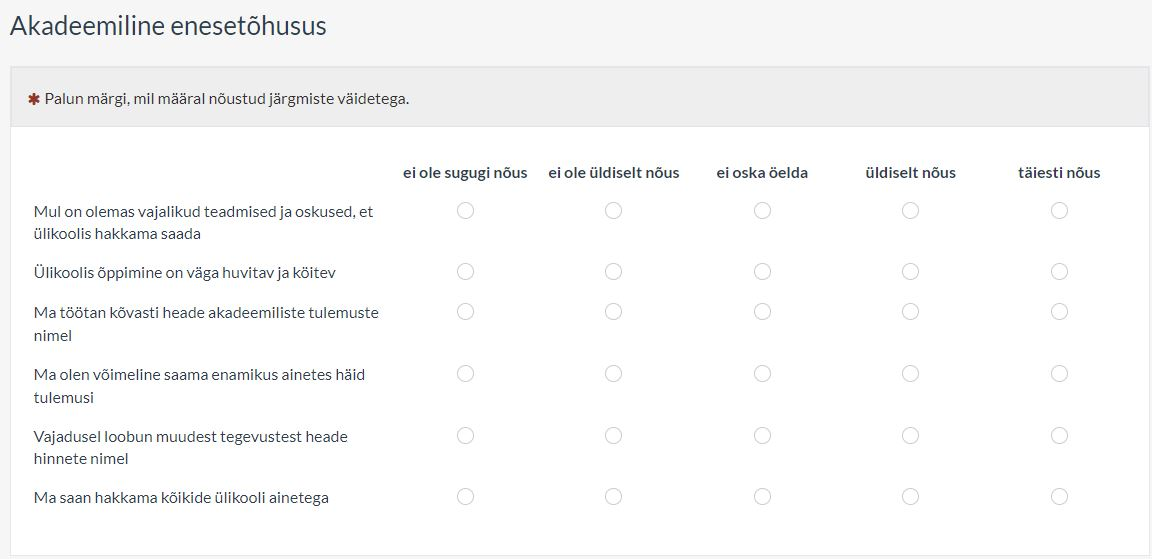


Would make sense to only use three statements 'Mul on olemas vajalikud teadmised...', 'Ma olen võimeline saama enamikus ainetes...' and 'Ma saan hakkama kõikide...'

In [8]:
reflex.iloc[:,[10,13]]

,Palun.märgi..mil.määral.nõustud.järgmiste.väidetega...Mul.on.olemas.vajalikud.teadmised.ja.oskused..et.ülikoolis.hakkama.saada.,Palun.märgi..mil.määral.nõustud.järgmiste.väidetega...Ma.olen.võimeline.saama.enamikus.ainetes.häid.tulemusi.
0,üldiselt nõus,üldiselt nõus
1,täiesti nõus,täiesti nõus
2,täiesti nõus,täiesti nõus
3,üldiselt nõus,ei oska öelda
4,üldiselt nõus,üldiselt nõus
...,...,...
148,ei ole üldiselt nõus,üldiselt nõus
149,üldiselt nõus,üldiselt nõus
150,üldiselt nõus,ei oska öelda
151,üldiselt nõus,ei ole üldiselt nõus


In [9]:
#subset the main dataframe for self-efficacy scale
#self_eff = reflex.iloc[:,10:16]
#self_eff = reflex.iloc[:,[10,12,13,14,15]] #as an experimet, let's leave out the second statement
self_eff = reflex.iloc[:,[10,13,15]] #as an experimet, let's only use tree statements
#the columns that is the statements are as following
se_statements = []
for col in self_eff.columns:
  title, statement = col.split('...')
  statement = statement.strip(']')
  se_statements.append(statement)
  #print(col)
se_statements = pd.DataFrame(se_statements)
print(se_statements)

                                                   0
0  Mul.on.olemas.vajalikud.teadmised.ja.oskused.....
1  Ma.olen.võimeline.saama.enamikus.ainetes.häid....
2         Ma.saan.hakkama.kõikide.ülikooli.ainetega.


In [10]:
#lets look at the scale values to order them
#using a random column that happens to have all of the points on the scale :)
set(reflex['Palun.märgi..mil.määral.nõustud.järgmiste.väidetega...Vajadusel.loobun.muudest.tegevustest.heade.hinnete.nimel.'])

{'ei ole sugugi nõus',
 'ei ole üldiselt nõus',
 'ei oska öelda',
 'täiesti nõus',
 'üldiselt nõus'}

In [11]:
#the levels of self-efficacy scale ordered according to the questionnaire
levels_se = ['ei ole sugugi nõus','ei ole üldiselt nõus', 'ei oska öelda','üldiselt nõus','täiesti nõus'] 

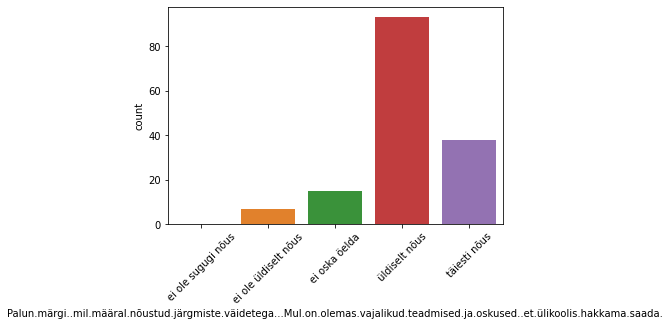

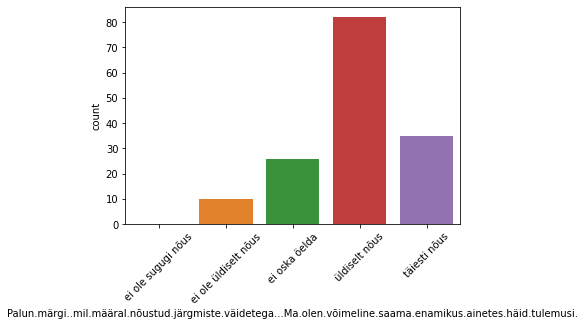

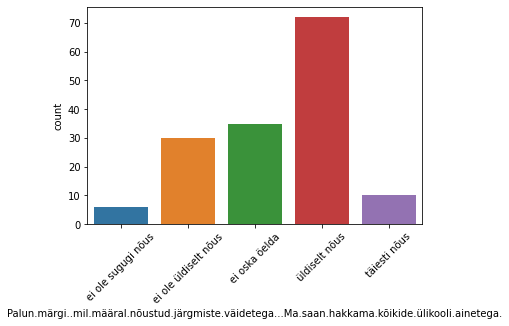

In [12]:
#lets create some countplots 
for statement in self_eff.columns:
  chart = sns.countplot(x = statement, data = self_eff, order = levels_se)
  chart.set_xticklabels(chart.get_xticklabels(), rotation = 45)
  plt.show()

# The sense of school belonging

Measured using the instrument that is also used in PISA tests. The instrument consists of 6 statements, 3 of which are positive and 3 are negative (indicating no belonging).
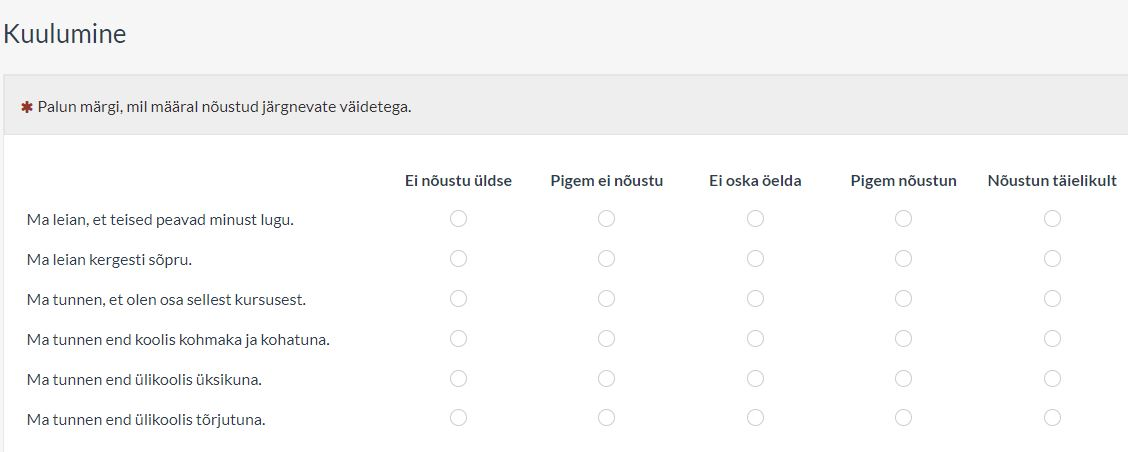

In [13]:
#subset the main dataframe to get the belonging scale
belonging = reflex.iloc[:,18:24]
#the columns that is the statements are as following
bl_statements = []
for col in belonging.columns:
  title, statement = col.split('...')
  statement = statement.strip('.')
  bl_statements.append(statement)
bl_statements = pd.DataFrame(bl_statements)
print(bl_statements)

                                          0
0    Ma.leian..et.teised.peavad.minust.lugu
1                   Ma.leian.kergesti.sõpru
2  Ma.tunnen..et.olen.osa.sellest.kursusest
3  Ma.tunnen.end.koolis.kohmaka.ja.kohatuna
4          Ma.tunnen.end.ülikoolis.üksikuna
5         Ma.tunnen.end.ülikoolis.tõrjutuna


In [14]:
#let's see what are the scale values
set(reflex['Palun.märgi..mil.määral.nõustud.järgnevate.väidetega...Ma.tunnen.end.koolis.kohmaka.ja.kohatuna..'])

{'Ei nõustu üldse',
 'Ei oska öelda',
 'Nõustun täielikult',
 'Pigem ei nõustu',
 'Pigem nõustun'}

In [15]:
#create the ordered list of scale values
levels_bl = ['Ei nõustu üldse','Pigem ei nõustu','Ei oska öelda', 'Pigem nõustun','Nõustun täielikult']

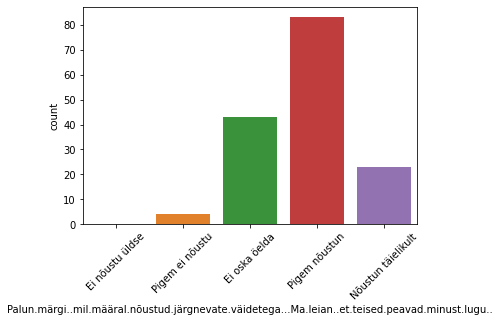

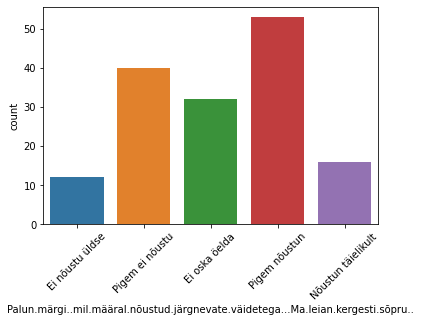

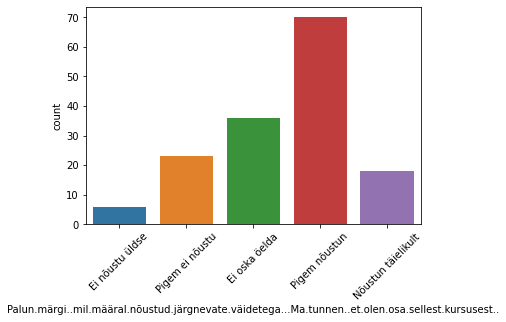

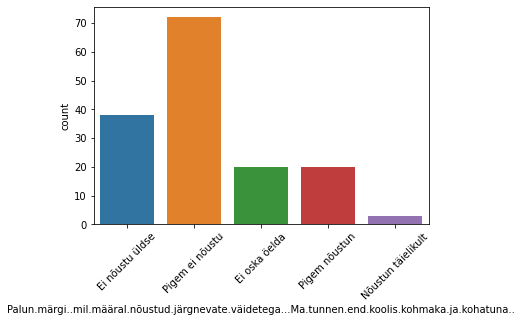

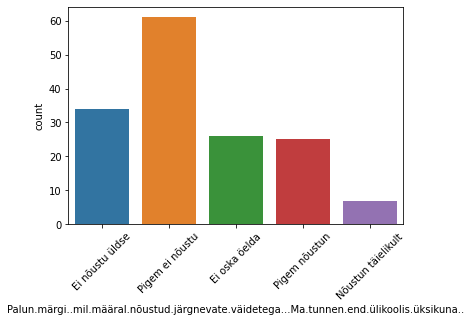

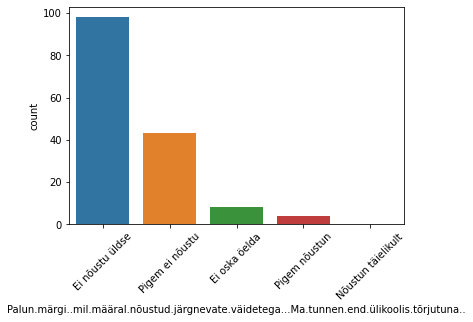

In [16]:
#lets create some countplots 
for statement in belonging.columns:
  chart = sns.countplot(x = statement, data = belonging, order = levels_bl)
  chart.set_xticklabels(chart.get_xticklabels(), rotation = 45)
  plt.show()

#Factor analysis

TODO:
* conformatory factor analysis
* get the factor loadings 
* calculate cronbach alpha


In [17]:
pip install factor_analyzer

#Factor analysis
whoop whoop!

### 1. Factor analysis of the self-efficacy instrument

In [18]:
levels_se

['ei ole sugugi nõus',
 'ei ole üldiselt nõus',
 'ei oska öelda',
 'üldiselt nõus',
 'täiesti nõus']

In [19]:
#first, we need to convert the data from strings to floats
self_efficacy_replacer = {'ei ole sugugi nõus':1,
                          'ei ole üldiselt nõus':2,
                          'ei oska öelda':3,
                          'üldiselt nõus':4, 
                          'täiesti nõus':5}

In [20]:
#rename the columns to make the replacing less painful
#self_eff.columns = ['eff1','eff2','eff3','eff4','eff5']
self_eff.columns = ['eff1','eff2','eff3']

In [21]:
self_eff0 = self_eff.replace({'eff1':self_efficacy_replacer, 'eff2':self_efficacy_replacer, 'eff3':self_efficacy_replacer, 'eff4':self_efficacy_replacer, 'eff5':self_efficacy_replacer, 'eff6':self_efficacy_replacer})

In [22]:
self_eff #the data with written levels

,eff1,eff2,eff3
0,üldiselt nõus,üldiselt nõus,üldiselt nõus
1,täiesti nõus,täiesti nõus,üldiselt nõus
2,täiesti nõus,täiesti nõus,ei oska öelda
3,üldiselt nõus,ei oska öelda,ei ole üldiselt nõus
4,üldiselt nõus,üldiselt nõus,ei ole sugugi nõus
...,...,...,...
148,ei ole üldiselt nõus,üldiselt nõus,täiesti nõus
149,üldiselt nõus,üldiselt nõus,ei oska öelda
150,üldiselt nõus,ei oska öelda,üldiselt nõus
151,üldiselt nõus,ei ole üldiselt nõus,ei ole sugugi nõus


In [23]:
self_eff0 #the same data with numbers
#write a file to check stufs in different environments
self_eff0.to_csv('selfefficacy.csv')

In [24]:
#https://factor-analyzer.readthedocs.io/en/latest/factor_analyzer.html
from factor_analyzer import FactorAnalyzer

In [25]:
#first try - with one factor
fa = FactorAnalyzer(n_factors = 1, rotation = None, method = 'ml')
#it probably makes more sense with two
#fa_2 = FactorAnalyzer(n_factors = 2, rotation = 'oblimin', method = 'ml')

In [26]:
fa.fit(self_eff0)
#fa_2.fit(self_eff0)

FactorAnalyzer(method='ml', n_factors=1, rotation=None, rotation_kwargs={})

In [27]:
import numpy as np
np.set_printoptions(suppress=True) #supress the scientific notation

In [28]:
print(f"loadings with one factor \n {fa.loadings_}")
#print(f" loadings with two factors \n {fa_2.loadings_}")

loadings with one factor 
 [[0.6689474 ]
 [0.59341636]
 [0.62740648]]


In [29]:
#twofactor_loadings = pd.DataFrame(fa_2.loadings_)#probably not needed anymore
onefactor_loadings = pd.DataFrame(fa.loadings_)

Lets make it pretty

In [30]:
pd.concat([onefactor_loadings, se_statements], axis = 1)

,0,0
0,0.668947,Mul.on.olemas.vajalikud.teadmised.ja.oskused.....
1,0.593416,Ma.olen.võimeline.saama.enamikus.ainetes.häid....
2,0.627406,Ma.saan.hakkama.kõikide.ülikooli.ainetega.


### 2. Factor analysis of the belonging instrument

In [31]:
levels_bl

['Ei nõustu üldse',
 'Pigem ei nõustu',
 'Ei oska öelda',
 'Pigem nõustun',
 'Nõustun täielikult']

In [32]:
belonging_replacer = {'Ei nõustu üldse':1,
                      'Pigem ei nõustu':2,
                      'Ei oska öelda':3,
                      'Pigem nõustun':4,
                      'Nõustun täielikult':5}

In [33]:
belonging.columns = ['bl1','bl2','bl3','bl4','bl5','bl6']
belonging0 = belonging.replace({'bl1':belonging_replacer,'bl2':belonging_replacer,'bl3':belonging_replacer,'bl4':belonging_replacer,'bl5':belonging_replacer,'bl6':belonging_replacer,})

In [34]:
belonging0

,bl1,bl2,bl3,bl4,bl5,bl6
0,3,2,3,3,4,2
1,4,4,5,1,1,1
2,3,2,4,3,2,1
3,4,2,1,4,5,3
4,5,1,2,4,4,1
...,...,...,...,...,...,...
148,4,5,4,5,3,4
149,4,3,4,3,3,1
150,3,3,4,3,3,1
151,5,4,5,2,1,1


In [35]:
#turn the last 3 statements. for cronbach's sake
belonging0['bl4_'] = 6 - belonging0['bl4']
belonging0['bl5_'] = 6 - belonging0['bl5']
belonging0['bl6_'] = 6 - belonging0['bl6']

In [36]:
belonging0

,bl1,bl2,bl3,bl4,bl5,bl6,bl4_,bl5_,bl6_
0,3,2,3,3,4,2,3,2,4
1,4,4,5,1,1,1,5,5,5
2,3,2,4,3,2,1,3,4,5
3,4,2,1,4,5,3,2,1,3
4,5,1,2,4,4,1,2,2,5
...,...,...,...,...,...,...,...,...,...
148,4,5,4,5,3,4,1,3,2
149,4,3,4,3,3,1,3,3,5
150,3,3,4,3,3,1,3,3,5
151,5,4,5,2,1,1,4,5,5


In [37]:
fa = FactorAnalyzer(n_factors = 1, rotation = None, method = 'ml')
fa.fit(belonging0.iloc[:,0:6])
fa.loadings_

array([[-0.38818336],
       [-0.59363664],
       [-0.61787275],
       [ 0.62307165],
       [ 0.81713604],
       [ 0.53356415]])

Lets make it pretty

In [38]:
belonging_loadings = pd.DataFrame(fa.loadings_)
pd.concat([belonging_loadings, bl_statements], axis=1)

,0,0
0,-0.388183,Ma.leian..et.teised.peavad.minust.lugu
1,-0.593637,Ma.leian.kergesti.sõpru
2,-0.617873,Ma.tunnen..et.olen.osa.sellest.kursusest
3,0.623072,Ma.tunnen.end.koolis.kohmaka.ja.kohatuna
4,0.817136,Ma.tunnen.end.ülikoolis.üksikuna
5,0.533564,Ma.tunnen.end.ülikoolis.tõrjutuna


# Kronbach alpha


alpha leidmiseks on vaja pööratud ümber pöörata (näiteks 6-muutuja vms)


In [ ]:
pip install pingouin --upgrade

In [39]:
import pingouin as pg
#cronbach for self-efficacy instrument
pg.cronbach_alpha(data=self_eff0)

(0.6528895146151785, array([0.545, 0.738]))

The belonging instrument requires turning some of the scales. Which is done previously, now we just select.

In [40]:
belonging_turned = belonging0.loc[:,['bl1','bl2','bl3','bl4_','bl5_','bl6_']]
#cronbach for belonging instrument
pg.cronbach_alpha(data=belonging_turned)

(0.7688543907633434, array([0.707, 0.821]))